In [1]:
import wilson
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_style("ticks")
sns.set_context("paper", font_scale = 1.8)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 25

In [2]:
# Set initial coefficients and basis in the UV
wc_UV = {'lq1_1211': 1e-6}
E_UV = 1e3 # GeV
eft_UV = 'SMEFT'
basis_UV = 'Warsaw'

In [3]:
# Initialize Wilson object
willy = wilson.Wilson(wc_UV, scale = E_UV, eft = eft_UV, basis = basis_UV)
# Choose RGE evolution scheme ['integrate' or 'leadinglog']
willy.set_option('smeft_accuracy', 'integrate') 

In [4]:
# Define the energies to run to (there is a better way to do this with run_continuous)
E = np.linspace(E_UV, 2, 100) # GeV
eft_IR = 'WET-3'
basis_IR = 'JMS'

# Initialize list with relevant WET-3 operators
mue_sector = ['egamma_12', 'VeuLL_1211', 'VedLL_1211', 'VedLL_1222', 'VeuRR_1211', 'VedRR_1211', 'VedRR_1222', 'VeuLR_1211', 'VedLR_1211', 'VedLR_1222','VueLR_1112',
              'VdeLR_1112', 'VdeLR_2212', 'SeuRL_1211', 'SedRL_1211', 'SedRL_1222', 'SeuRR_1211', 'SedRR_1211', 'SedRR_1222', 'TeuRR_1211', 'TedRR_1211', 'TedRR_1222']
# Initialize WET-3 coefficient dictionary for plotting
mue_operator_dict = {'egamma_12':[], 'VeuLL_1211':[], 'VedLL_1211':[], 'VedLL_1222':[], 'VeuRR_1211':[], 'VedRR_1211':[], 'VedRR_1222':[], 'VeuLR_1211':[],
                 'VedLR_1211':[], 'VedLR_1222':[],'VueLR_1112':[], 'VdeLR_1112':[], 'VdeLR_2212':[], 'SeuRL_1211':[], 'SedRL_1211':[], 'SedRL_1222':[], 
                 'SeuRR_1211':[], 'SedRR_1211':[], 'SedRR_1222':[], 'TeuRR_1211':[], 'TedRR_1211':[], 'TedRR_1222':[]}

for e in tqdm(E):
    wc_i = willy.match_run(scale = e, eft = eft_IR, basis = basis_IR, sectors = 'mue')
    for keys in mue_sector:
        mue_operator_dict[keys].append(wc_i[keys])

# Convert dictionary lists to numpy arrays
for keys in mue_sector:
        mue_operator_dict[keys] = np.array(mue_operator_dict[keys])

100%|██████████████████████████████████| 100/100 [00:02<00:00, 46.01it/s]


In [5]:
# Print all of the coefficients in the mue sector
for key in mue_sector:
    try:
        print(key, wc_i.dict[key])
    except:
        print(key, 'was not generated')
        wc_i.dict[key] = 0.

egamma_12 (-1.7079326909949972e-14+1.643969062296765e-26j)
VeuLL_1211 (-9.86608329636326e-07+3.943280779021029e-21j)
VedLL_1211 (-9.749664580063736e-07+3.896745273440699e-21j)
VedLL_1222 (-1.865024960543527e-09+7.448929797995061e-24j)
VeuRR_1211 (1.962470641316426e-19-7.908496965555636e-34j)
VedRR_1211 (-9.649019355410305e-20+3.888010634668782e-34j)
VedRR_1222 (-9.649019286941388e-20+3.862054221356606e-34j)
VeuLR_1211 (3.691800453757848e-09-1.4750892246946337e-23j)
VedLR_1211 (-1.8761765042619403e-09+7.496393202130622e-24j)
VedLR_1222 (-1.8761764978191178e-09+7.544836522431197e-24j)
VueLR_1112 (-5.0951795357744733e-17+2.0422733754098304e-31j)
VdeLR_1112 (-5.56436262970416e-17+2.2303226542330703e-31j)
VdeLR_2212 (-9.778629492567272e-20+3.930145774821915e-34j)
SeuRL_1211 was not generated
SedRL_1211 (4.648505047610797e-16-1.858240733188174e-30j)
SedRL_1222 (-2.976218355249423e-17-2.875903390249634e-30j)
SeuRR_1211 (-2.3306413461352105e-16+4.172644308756877e-28j)
SedRR_1211 was not genera

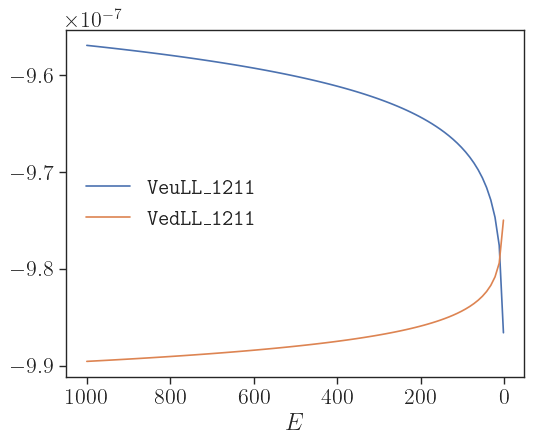

In [6]:
# Plot the largest two WCs
fig, ax = plt.subplots(1,1,figsize = (6,5))
ax.plot(E, np.real(mue_operator_dict['VeuLL_1211']), label = r'$\mathtt{VeuLL\_1211}$')
ax.plot(E, np.real(mue_operator_dict['VedLL_1211']), label = r'$\mathtt{VedLL\_1211}$')
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_xlabel(r'$E$')
ax.legend(frameon = False)
fig.tight_layout()

In [7]:
# Define the translation to the MuonConverter basis
def JMS_to_muonConverter(wet3_dict):
    """
    Given a Wilson coefficient dictionary in the WET-3 JMS basis (wet3), convert
    to the MuonConverter (mc) basis.

    Input:
    wet3_dict (dictionary): Dictionary composed of mue sector numerical Wilson coefficients in the WET-3 JMS basis.

    Output:
    wc_dict (dictionary): Dictionary containing translated coefficients now in the MuonConverter basis
    """
    # Initialize a MuonConverter dictionary
    mc_dict = {'Tegamma_12': 0., 'ATegamma_12': 0., 'VVeu_1211': 0., 'VVed_1211': 0., 'VVed_1222': 0., 'AVVeu_1211': 0., 'AVVed_1211': 0., 'AVVed_1222': 0.,
               'VAVeu_1211': 0., 'VAVed_1211': 0., 'VAVed_1222': 0., 'AVAVeu_1211': 0., 'AVAVed_1211': 0., 'AVAVed_1222': 0., 'SSeu_1211': 0., 'SSed_1211': 0.,
               'SSed_1222': 0., 'ASeu_1211': 0., 'ASed_1211': 0., 'ASed_1222': 0., 'SAeu_1211': 0., 'SAed_1211': 0., 'SAed_1222': 0., 'AAeu_1211': 0.,
               'AAed_1211': 0., 'AAed_1222': 0., 'TTeu_1211': 0., 'TTed_1211': 0., 'TTed_1222': 0., 'ATTeu_1211': 0., 'ATTed_1211': 0., 'ATTed_1222': 0.}

    mc_dict['Tegamma_12'] = 4. * np.pi**2 * wet3_dict['egamma_12']
    mc_dict['ATegamma_12'] = - 4. * np.pi**2 * 1j * wet3_dict['egamma_12']
    
    mc_dict['VVeu_1211'] = (wet3_dict['VeuLL_1211'] + wet3_dict['VeuRR_1211'] + wet3_dict['VeuLR_1211'] + wet3_dict['VueLR_1112']) / 4.
    mc_dict['VVed_1211'] = (wet3_dict['VedLL_1211'] + wet3_dict['VedRR_1211'] + wet3_dict['VedLR_1211'] + wet3_dict['VdeLR_1112']) / 4.
    mc_dict['VVed_1222'] = (wet3_dict['VedLL_1222'] + wet3_dict['VedRR_1222'] + wet3_dict['VedLR_1222'] + wet3_dict['VdeLR_2212']) / 4.
    
    mc_dict['AVVeu_1211'] = (-wet3_dict['VeuLL_1211'] + wet3_dict['VeuRR_1211'] + wet3_dict['VeuLR_1211'] - wet3_dict['VueLR_1112']) / 4.
    mc_dict['AVVed_1211'] = (-wet3_dict['VedLL_1211'] + wet3_dict['VedRR_1211'] + wet3_dict['VedLR_1211'] - wet3_dict['VdeLR_1112']) / 4.
    mc_dict['AVVed_1222'] = (-wet3_dict['VedLL_1222'] + wet3_dict['VedRR_1222'] + wet3_dict['VedLR_1222'] - wet3_dict['VdeLR_2212']) / 4.
    
    mc_dict['VAVeu_1211'] = (-wet3_dict['VeuLL_1211'] + wet3_dict['VeuRR_1211'] - wet3_dict['VeuLR_1211'] + wet3_dict['VueLR_1112']) / 4.
    mc_dict['VAVed_1211'] = (-wet3_dict['VedLL_1211'] + wet3_dict['VedRR_1211'] - wet3_dict['VedLR_1211'] + wet3_dict['VdeLR_1112']) / 4.
    mc_dict['VAVed_1222'] = (-wet3_dict['VedLL_1222'] + wet3_dict['VedRR_1222'] - wet3_dict['VedLR_1222'] + wet3_dict['VdeLR_2212']) / 4.

    mc_dict['AVAVeu_1211'] = (wet3_dict['VeuLL_1211'] + wet3_dict['VeuRR_1211'] - wet3_dict['VeuLR_1211'] - wet3_dict['VueLR_1112']) / 4.
    mc_dict['AVAVed_1211'] = (wet3_dict['VedLL_1211'] + wet3_dict['VedRR_1211'] - wet3_dict['VedLR_1211'] - wet3_dict['VdeLR_1112']) / 4.
    mc_dict['AVAVed_1222'] = (wet3_dict['VedLL_1222'] + wet3_dict['VedRR_1222'] - wet3_dict['VedLR_1222'] - wet3_dict['VdeLR_2212']) / 4.

    mc_dict['SSeu_1211'] = (wet3_dict['SeuRL_1211'] + wet3_dict['SeuRL_1211']) / 4.
    mc_dict['SSed_1211'] = (wet3_dict['SedRL_1211'] + wet3_dict['SedRL_1211']) / 4.
    mc_dict['SSed_1222'] = (wet3_dict['SedRL_1211'] + wet3_dict['SedRL_1222']) / 4.

    mc_dict['ASeu_1211'] = -1j * (wet3_dict['SeuRL_1211'] + wet3_dict['SeuRR_1211']) / 4.
    mc_dict['ASed_1211'] = -1j * (wet3_dict['SedRL_1211'] + wet3_dict['SedRR_1211']) / 4.
    mc_dict['ASed_1222'] = -1j * (wet3_dict['SedRL_1222'] + wet3_dict['SedRR_1222']) / 4.

    mc_dict['SAeu_1211'] = 1j * (wet3_dict['SeuRL_1211'] - wet3_dict['SeuRR_1211']) / 4.
    mc_dict['SAed_1211'] = 1j * (wet3_dict['SedRL_1211'] - wet3_dict['SedRR_1211']) / 4.
    mc_dict['SAed_1222'] = 1j * (wet3_dict['SedRL_1222'] - wet3_dict['SedRR_1222']) / 4.

    mc_dict['AAeu_1211'] = (wet3_dict['SeuRL_1211'] - wet3_dict['SeuRR_1211']) / 4.
    mc_dict['AAed_1211'] = (wet3_dict['SedRL_1211'] - wet3_dict['SedRR_1211']) / 4.
    mc_dict['AAed_1222'] = (wet3_dict['SedRL_1222'] - wet3_dict['SedRR_1222']) / 4.

    mc_dict['TTeu_1211'] = wet3_dict['TeuRR_1211'] / 4.
    mc_dict['TTed_1211'] = wet3_dict['TedRR_1211'] / 4.
    mc_dict['TTed_1222'] = wet3_dict['TedRR_1222'] / 4.

    mc_dict['ATTeu_1211'] = wet3_dict['TeuRR_1211'] / 4.
    mc_dict['ATTed_1211'] = wet3_dict['TedRR_1211'] / 4.
    mc_dict['ATTed_1222'] = wet3_dict['TedRR_1222'] / 4.

    return mc_dict

In [8]:
# Generate a single point in coefficient space
wc_i = willy.match_run(scale = 2, eft = eft_IR, basis = basis_IR, sectors = 'mue')
for keys in mue_sector:
    mue_operator_dict[keys] = wc_i[keys]

# Convert to MuonConverter basis
mc_mue_operator_dict = JMS_to_muonConverter(mue_operator_dict)

# Print all of the coefficients in the translated dictionary
for k, v in mc_mue_operator_dict.items():
    print(k, v)

Tegamma_12 (-6.742648001523446e-13+6.4901297169995595e-25j)
ATegamma_12 (6.4901297169995595e-25+6.742648001523446e-13j)
VVeu_1211 (-2.457291323083309e-07+9.821324717443798e-22j)
VVed_1211 (-2.4421065864159394e-07+9.760604167165627e-22j)
VVed_1222 (-9.353003646392303e-10+3.7484415803013694e-24j)
AVVeu_1211 (2.4757503253530796e-07-9.895079178682484e-22j)
AVVed_1211 (2.432725703894147e-07-9.723122201153029e-22j)
AVVed_1222 (-2.7878843185736368e-12+2.397668110733174e-26j)
VAVeu_1211 (2.4572913228295315e-07-9.821324716426614e-22j)
VAVed_1211 (2.442106586137238e-07-9.76060416604852e-22j)
VAVed_1222 (9.353003645420922e-10-3.748441579911759e-24j)
AVAVeu_1211 (-2.475750325097339e-07+9.895079177657393e-22j)
AVAVed_1211 (-2.432725703616411e-07+9.723122200039811e-22j)
AVAVed_1222 (2.787884319221682e-12-2.3976681110736163e-26j)
SSeu_1211 0.0
SSed_1211 (2.3242525238053986e-16-9.29120366594087e-31j)
SSed_1222 (1.0877208030214637e-16-1.183536030859452e-30j)
ASeu_1211 (1.0431610771892193e-28+5.82660336

In [9]:
import mu2e_matching

In [10]:
# Create one final conversion dictionary for input
mc_dict = {'C51': mc_mue_operator_dict['Tegamma_12'], 'C52': mc_mue_operator_dict['ATegamma_12'], 
           'C61u': mc_mue_operator_dict['VVeu_1211'], 'C61d': mc_mue_operator_dict['VVed_1211'], 'C61s': mc_mue_operator_dict['VVed_1222'], 
           'C62u': mc_mue_operator_dict['AVVeu_1211'], 'C62d': mc_mue_operator_dict['AVVed_1211'], 'C62s': mc_mue_operator_dict['AVVed_1222'], 
           'C63u': mc_mue_operator_dict['VAVeu_1211'], 'C63d': mc_mue_operator_dict['VAVed_1211'], 'C63s': mc_mue_operator_dict['VAVed_1222'], 
           'C64u': mc_mue_operator_dict['AVAVeu_1211'], 'C64d': mc_mue_operator_dict['AVAVed_1211'], 'C64s': mc_mue_operator_dict['AVAVed_1222'],
           'C65u': mc_mue_operator_dict['SSeu_1211'], 'C65d': mc_mue_operator_dict['SSed_1211'], 'C65s': mc_mue_operator_dict['SSed_1222'],
           'C67u': mc_mue_operator_dict['ASeu_1211'], 'C67d': mc_mue_operator_dict['ASed_1211'], 'C67s': mc_mue_operator_dict['ASed_1222'],
           'C66u': mc_mue_operator_dict['SAeu_1211'], 'C66d': mc_mue_operator_dict['SAed_1211'], 'C66s': mc_mue_operator_dict['SAed_1222'],
           'C68u': mc_mue_operator_dict['AAeu_1211'], 'C68d': mc_mue_operator_dict['AAed_1211'], 'C68s': mc_mue_operator_dict['AAed_1222'],
           'C69u': mc_mue_operator_dict['TTeu_1211'], 'C69d': mc_mue_operator_dict['TTed_1211'], 'C69s': mc_mue_operator_dict['TTed_1222'],
           'C610u': mc_mue_operator_dict['ATTeu_1211'], 'C610d': mc_mue_operator_dict['ATTed_1211'], 'C610s': mc_mue_operator_dict['ATTed_1222']}            

In [11]:
# Initialize an instance of the 3-flavor Wilson coefficient class. 
wc3f = mu2e_matching.WC_3f(mc_dict)
print('Parton-level Wilson coefficients: ', wc3f.coeff_dict)

# The main method is to output the NR coefficients. 
q = np.array([0., 1.3, 1.2, 1.2])

wc3f_nucleon = wc3f.match_nucleon_basis(q = q)
#print('Nucleon-level Wilson coefficients: ', wc3f_nucleon)

# We can create the relevant yaml file and run the decay rate computation
element     = 'Al'
isotope     = 0
interaction = 'bw'
oscb        = 0
isochar     = 'proton'
plots       = 'none'
path = './wcN.yaml'

wc3f.write_yaml(q = q, element = element, isotope = isotope, interaction = interaction, oscb = oscb, isochar = isochar, plots = plots, path = path)

Parton-level Wilson coefficients:  {'C51': (-6.742648001523446e-13+6.4901297169995595e-25j), 'C52': (6.4901297169995595e-25+6.742648001523446e-13j), 'C61u': (-2.457291323083309e-07+9.821324717443798e-22j), 'C61d': (-2.4421065864159394e-07+9.760604167165627e-22j), 'C61s': (-9.353003646392303e-10+3.7484415803013694e-24j), 'C62u': (2.4757503253530796e-07-9.895079178682484e-22j), 'C62d': (2.432725703894147e-07-9.723122201153029e-22j), 'C62s': (-2.7878843185736368e-12+2.397668110733174e-26j), 'C63u': (2.4572913228295315e-07-9.821324716426614e-22j), 'C63d': (2.442106586137238e-07-9.76060416604852e-22j), 'C63s': (9.353003645420922e-10-3.748441579911759e-24j), 'C64u': (-2.475750325097339e-07+9.895079177657393e-22j), 'C64d': (-2.432725703616411e-07+9.723122200039811e-22j), 'C64s': (2.787884319221682e-12-2.3976681110736163e-26j), 'C65u': 0.0, 'C65d': (2.3242525238053986e-16-9.29120366594087e-31j), 'C65s': (1.0877208030214637e-16-1.183536030859452e-30j), 'C66u': (1.0431610771892193e-28+5.82660336

In [12]:
from mu2e_relativistic import compute_decay_rate

In [13]:
decay_rate = compute_decay_rate('wcN.yaml')

In [14]:
print(decay_rate)

4.538213575332675e-05


In [15]:
# Check answer with command line
!python3.9 mu2e_relativistic_terminal.py wcN.yaml

Processing wcN.yaml
Found element Aluminum, symbol Al
Elastic/Al27_bw.txt
testFM needs Sulfer selected
testWM needs Copper selected
{'AbNorm': array([1.]),
 'Abar': 27.0,
 'Ebind': 0.462953,
 'Element': 'Aluminum',
 'Interaction': 'bw',
 'InteractionReport': 'Brown-Wildenthal',
 'Isotope': 0,
 'Mbar': 25133.141755999997,
 'RZ2': 208.36206871175244,
 'Z': 13,
 'Zeff': 11.3086,
 'bs': [],
 'cs': [],
 'ds': [[1, 1.7540467156209856e-15, -9.953972264691222e-17],
        [2, -3.2739462498922585e-23, -7.868864455374129e-25],
        [3, 7.765031117411569e-28, 4.809553920369596e-29],
        [4, -8.318550469828555e-09, -5.528195136969765e-10],
        [5, -7.349096864248872e-07, -7.592368333685021e-10],
        [6, -5.2930332829155336e-08, 1.4068658522317912e-09],
        [7, 1.0775401848450994e-07, 9.684825062344825e-10],
        [8, 0.0, 0.0],
        [9, 1.6088952135972456e-16, 1.6088952135972456e-16],
        [10, 1.930674256316691e-17, -5.962565661591392e-16],
        [11, -0.0, 0.0],
   

In [16]:
# Finally, it is typically useful to perform a scan over initial WC values -- we illustrate this here:

# Define a range of initial values for a single WC coefficients
lq1_1211 = np.linspace(1e-10, 1e-3, 100) # GeV
E_UV = 1e3 # GeV
eft_UV = 'SMEFT'
basis_UV = 'Warsaw'
E_IR = 2 # GeV
eft_IR = 'WET-3'
basis_IR = 'JMS'

# Initialize list with relevant WET-3 operators
mue_sector = ['egamma_12', 'VeuLL_1211', 'VedLL_1211', 'VedLL_1222', 'VeuRR_1211', 'VedRR_1211', 'VedRR_1222', 'VeuLR_1211', 
              'VedLR_1211', 'VedLR_1222', 'VueLR_1112', 'VdeLR_1112', 'VdeLR_2212', 'SeuRL_1211', 'SedRL_1211', 'SedRL_1222',
              'SeuRR_1211', 'SedRR_1211', 'SedRR_1222', 'TeuRR_1211', 'TedRR_1211', 'TedRR_1222']
# Initialize WET-3 coefficient dictionary for plotting
mue_operator_dict = {'egamma_12':[], 'VeuLL_1211':[], 'VedLL_1211':[], 'VedLL_1222':[], 'VeuRR_1211':[], 'VedRR_1211':[], 'VedRR_1222':[], 'VeuLR_1211':[],
                 'VedLR_1211':[], 'VedLR_1222':[],'VueLR_1112':[], 'VdeLR_1112':[], 'VdeLR_2212':[], 'SeuRL_1211':[], 'SedRL_1211':[], 'SedRL_1222':[], 
                 'SeuRR_1211':[], 'SedRR_1211':[], 'SedRR_1222':[], 'TeuRR_1211':[], 'TedRR_1211':[], 'TedRR_1222':[]}

for wc in tqdm(lq1_1211):
    # Initialize Wilson object
    willy = wilson.Wilson({'lq1_1211': wc}, scale = E_UV, eft = eft_UV, basis = basis_UV)
    # Choose RGE evolution scheme ['integrate' or 'leadinglog']
    willy.set_option('smeft_accuracy', 'integrate')
    # Run and match
    wc_i = willy.match_run(scale = e, eft = eft_IR, basis = basis_IR, sectors = 'mue')
    for keys in mue_sector:
        mue_operator_dict[keys].append(wc_i[keys])

# Convert dictionary lists to numpy arrays
for keys in mue_sector:
        mue_operator_dict[keys] = np.array(mue_operator_dict[keys])

100%|██████████████████████████████████| 100/100 [02:17<00:00,  1.37s/it]


In [17]:
# Convert to MuonConverter basis
mc_mue_operator_dict = JMS_to_muonConverter(mue_operator_dict)

In [18]:
# Create one final conversion dictionary for input
mc_dict = {'C51': mc_mue_operator_dict['Tegamma_12'], 'C52': mc_mue_operator_dict['ATegamma_12'], 
           'C61u': mc_mue_operator_dict['VVeu_1211'], 'C61d': mc_mue_operator_dict['VVed_1211'], 'C61s': mc_mue_operator_dict['VVed_1222'], 
           'C62u': mc_mue_operator_dict['AVVeu_1211'], 'C62d': mc_mue_operator_dict['AVVed_1211'], 'C62s': mc_mue_operator_dict['AVVed_1222'], 
           'C63u': mc_mue_operator_dict['VAVeu_1211'], 'C63d': mc_mue_operator_dict['VAVed_1211'], 'C63s': mc_mue_operator_dict['VAVed_1222'], 
           'C64u': mc_mue_operator_dict['AVAVeu_1211'], 'C64d': mc_mue_operator_dict['AVAVed_1211'], 'C64s': mc_mue_operator_dict['AVAVed_1222'],
           'C65u': mc_mue_operator_dict['SSeu_1211'], 'C65d': mc_mue_operator_dict['SSed_1211'], 'C65s': mc_mue_operator_dict['SSed_1222'],
           'C67u': mc_mue_operator_dict['ASeu_1211'], 'C67d': mc_mue_operator_dict['ASed_1211'], 'C67s': mc_mue_operator_dict['ASed_1222'],
           'C66u': mc_mue_operator_dict['ASeu_1211'], 'C66d': mc_mue_operator_dict['ASed_1211'], 'C66s': mc_mue_operator_dict['ASed_1222'],
           'C68u': mc_mue_operator_dict['AAeu_1211'], 'C68d': mc_mue_operator_dict['AAed_1211'], 'C68s': mc_mue_operator_dict['AAed_1222'],
           'C69u': mc_mue_operator_dict['TTeu_1211'], 'C69d': mc_mue_operator_dict['TTed_1211'], 'C69s': mc_mue_operator_dict['TTed_1222'],
           'C610u': mc_mue_operator_dict['ATTeu_1211'], 'C610d': mc_mue_operator_dict['ATTed_1211'], 'C610s': mc_mue_operator_dict['ATTed_1222']}

In [19]:
print(mc_dict['C66u'])

[-1.04086478e-32-5.82660337e-21j  1.05384254e-27+5.88551562e-16j
  2.10767785e-27+1.17709730e-15j  3.16151492e-27+1.76564304e-15j
  4.21516280e-27+2.35418878e-15j  5.26849235e-27+2.94273453e-15j
  6.32298490e-27+3.53128028e-15j  7.37659136e-27+4.11982604e-15j
  8.42958752e-27+4.70837181e-15j  9.48361344e-27+5.29691759e-15j
  1.05367208e-26+5.88546337e-15j  1.15903367e-26+6.47400917e-15j
  1.26453923e-26+7.06255498e-15j  1.36980786e-26+7.65110081e-15j
  1.47509767e-26+8.23964665e-15j  1.58068498e-26+8.82819250e-15j
  1.68608838e-26+9.41673837e-15j  1.79151448e-26+1.00052843e-14j
  1.89660742e-26+1.05938302e-14j  2.00221475e-26+1.11823761e-14j
  2.10760731e-26+1.17709221e-14j  2.21298048e-26+1.23594680e-14j
  2.31815314e-26+1.29480140e-14j  2.42351034e-26+1.35365601e-14j
  2.52912253e-26+1.41251061e-14j  2.63441919e-26+1.47136522e-14j
  2.73955093e-26+1.53021983e-14j  2.84497230e-26+1.58907444e-14j
  2.95019938e-26+1.64792906e-14j  3.05571570e-26+1.70678368e-14j
  3.16148145e-26+1.765638

In [20]:
# We can create the relevant yaml file and run the decay rate computation
element     = 'Al'
isotope     = 0
interaction = 'bw'
oscb        = 0
isochar     = 'proton'
plots       = 'none'
path = './wcN.yaml'

decay_rate = []

for i in tqdm(range(100)):
    # Grab the ith value from each array in the dictionary 
    mc_dict_i = {}
    for k, v in mc_dict.items():
        mc_dict_i[k] = mc_dict[k][i]
    # Initialize an instance of the 3-flavor Wilson coefficient class. 
    wc3f = mu2e_matching.WC_3f(mc_dict_i)
    #print('Parton-level Wilson coefficients: ', wc3f.coeff_dict)
    
    # The main method is to output the NR coefficients. 
    q = np.array([0., 1.3, 1.2, 1.2])
    # Convert to the nucleon basis
    wc3f_nucleon = wc3f.match_nucleon_basis(q = q)
    # Write out the yaml file
    wc3f.write_yaml(q = q, element = element, isotope = isotope, interaction = interaction, oscb = oscb, isochar = isochar, plots = plots, path = path)
    # Compute the decay rate
    decay_rate.append(compute_decay_rate('wcN.yaml'))

100%|██████████████████████████████████| 100/100 [02:51<00:00,  1.71s/it]


In [21]:
# Convert decay rates to numpy array
decay_rate = np.array(decay_rate)

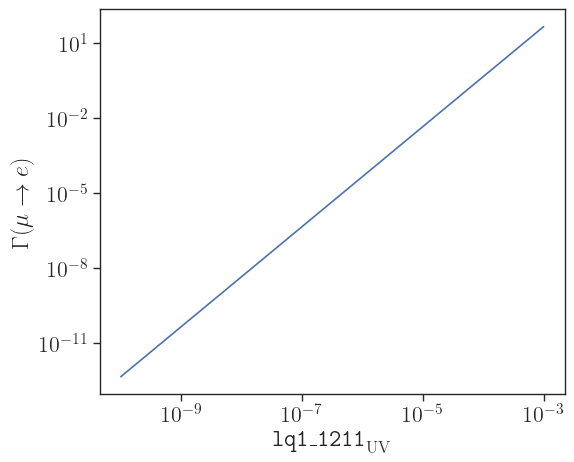

In [28]:
# Convert decay rates to numpy array
decay_rate = np.array(decay_rate)

fig, ax = plt.subplots(1,1,figsize=(6,5))
ax.plot(lq1_1211, decay_rate)
ax.set_xlabel(r'$\mathtt{lq1\_1211}_{\mathrm{UV}}$')
ax.set_ylabel(r'$\Gamma(\mu \rightarrow e)$')
ax.set_yscale('log')
ax.set_xscale('log')